In [1]:
import glob
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 500)
tqdm.pandas()

## Tests

In [94]:
df = pd.read_csv(
    'FACIT/data_gov_feed_FACIT04.csv', 
    error_bad_lines=False)

b'Skipping line 24191: expected 30 fields, saw 422\n'
b'Skipping line 67774: expected 30 fields, saw 86\n'
b'Skipping line 483581: expected 30 fields, saw 142\n'
b'Skipping line 13678235: expected 30 fields, saw 31\n'
b'Skipping line 16024496: expected 30 fields, saw 32\nSkipping line 16024497: expected 30 fields, saw 32\nSkipping line 16024498: expected 30 fields, saw 32\nSkipping line 16024499: expected 30 fields, saw 32\nSkipping line 16024500: expected 30 fields, saw 32\nSkipping line 16024501: expected 30 fields, saw 32\nSkipping line 16024502: expected 30 fields, saw 32\nSkipping line 16024503: expected 30 fields, saw 32\nSkipping line 16024504: expected 30 fields, saw 32\nSkipping line 16024505: expected 30 fields, saw 32\nSkipping line 16024506: expected 30 fields, saw 32\nSkipping line 16024507: expected 30 fields, saw 32\nSkipping line 16024508: expected 30 fields, saw 32\nSkipping line 16024509: expected 30 fields, saw 32\nSkipping line 16024510: expected 30 fields, saw 32\n

In [52]:
df.drop_duplicates(inplace=True)
df.shape

(18616, 30)

In [98]:
df['FAP_DEFINITION'].value_counts()

WPA Non-Fed. Repos. Loan      8414195
WPA Non-Fed. Repos. Alloc.    7865724
New Deal Fine Art Projects      25866
Art-in-Architecture             14819
Special Purchase                 6371
Fine Arts                        3409
Architectural Model/Plans         587
I                                 228
Other Federal Agency               63
Other                              38
Name: FAP_DEFINITION, dtype: int64

In [62]:
df.dropna(how='all', inplace=True)

In [93]:
df[df['FAARTIST_SURNAME'].str.contains('tella', na=False)]

,FAARTIST_SURNAME,FAO_CODE,FAO_DEFINITION,FAO_EMAIL,FAO_FIRSTNAME,FAO_ID,FAO_LASTNAME,FAO_PHONE,FAO_REGION,FAP_DEFINITION,FAP_ID,FINEARTS_AGENCIES_ID,FINEARTS_APPRAISAL,FINEARTS_APPRAISER_SOURCE,FINEARTS_APPRYEAR,FINEARTS_ARTWORKDIM,FINEARTS_BLOAN,FINEARTS_BORROWER,FINEARTS_BORRTITLE,FINEARTS_BUILDING_ID,FINEARTS_DEACCESSIONED,FINEARTS_ELOAN,FINEARTS_EXECDATE,FINEARTS_EXECDATE_YEAR,FINEARTS_EXTINT,FINEARTS_FAARTIST_ID,FINEARTS_FAO_ID,FINEARTS_FAP_ID,FINEARTS_FRAMEDIM,FINEARTS_ILOAN
2816575,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816576,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816577,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816578,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816579,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816580,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816581,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816582,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816583,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN
2816584,Stella,WEB,"Gibson,Jennifer",NaN,Jennifer,20.0,Gibson,202-501-0930,12,WPA Non-Fed. Repos. Alloc.,WNA,55.0,0,NaN,NaN,"36 x 30""""",NaN,NaN,NaN,491.0,0,NaN,ca.1935,1935,I,1821,20,WNA,NaN,NaN


In [86]:
df.sort_values('finearts_appraisal', ascending=False)

,faartist_surname,fap_definition,finearts_date,finearts_appraisal,finearts_building_id,finearts_deaccessioned,dim_width_inches,dim_height_inches,building_city,building_id,building_name,building_state,building_zip
16334099,Puryear,Art-in-Architecture,1997-01-01,1000000.0,109.0,0,NaN,NaN,Washington,109.0,Ronald Reagan Building,DC,20002.0
16334100,Puryear,Art-in-Architecture,1997-01-01,1000000.0,109.0,0,NaN,NaN,Washington,109.0,Ronald Reagan Building,DC,20002.0
15490302,Stella,Art-in-Architecture,2005-01-01,875000.0,317.0,0,192.0,198.0,Central Islip,317.0,USDC Long Island Federal Courthouse,NY,11722.0
15490303,Stella,Art-in-Architecture,2005-01-01,875000.0,317.0,0,192.0,198.0,Central Islip,317.0,USDC Long Island Federal Courthouse,NY,11722.0
3421,Cadmus,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,36.0,Richmond,430.0,Court House Annex,VA,23200.0
3413,French,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,13.0,Richmond,430.0,Court House Annex,VA,23200.0
3405,French,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,13.0,Richmond,430.0,Court House Annex,VA,23200.0
3406,French,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,13.0,Richmond,430.0,Court House Annex,VA,23200.0
3407,French,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,13.0,Richmond,430.0,Court House Annex,VA,23200.0
3408,French,New Deal Fine Art Projects,1939-01-01,825000.0,430.0,0,83.0,13.0,Richmond,430.0,Court House Annex,VA,23200.0


In [88]:
df[df['faartist_surname'] == 'Puryear']

,faartist_surname,fap_definition,finearts_date,finearts_appraisal,finearts_building_id,finearts_deaccessioned,dim_width_inches,dim_height_inches,building_city,building_id,building_name,building_state,building_zip
8983227,Puryear,Art-in-Architecture,1995-01-01,50000.0,476.0,0,22.0,11.0,NaN,NaN,NaN,NaN,NaN
8983228,Puryear,Art-in-Architecture,1995-01-01,5000.0,476.0,0,13.0,18.0,NaN,NaN,NaN,NaN,NaN
16334099,Puryear,Art-in-Architecture,1997-01-01,1000000.0,109.0,0,NaN,NaN,Washington,109.0,Ronald Reagan Building,DC,20002.0
16334100,Puryear,Art-in-Architecture,1997-01-01,1000000.0,109.0,0,NaN,NaN,Washington,109.0,Ronald Reagan Building,DC,20002.0


## Import the shape files

In [3]:
# Continental US bounds
continental_us_bounds = Polygon([
    [-126.474609375, 24.046463999666567],
    [-64.775390625, 24.046463999666567],
    [-64.775390625, 50.45750402042058],
    [-126.474609375, 50.45750402042058],
    [-126.474609375, 24.046463999666567]
])

In [4]:
# States
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states = states[states.within(continental_us_bounds)].to_crs(epsg=5070)

## Import the csv files

In [27]:
# Buildings
df_buildings = pd.read_csv(
    'FACIT/data_gov_feed_FACIT01.csv', 
    error_bad_lines=False,
    usecols=[
        'BUILDING_ID', 
        'BUILDING_CITY', 
        'BUILDING_NAME',
        'BUILDING_STATE',
        'BUILDING_ZIP'],
    dtype={
        'BUILDING_ID': float,
        'BUILDING_CITY': str,
        'BUILDING_NAME': str,
        'BUILDING_STATE': str,
        'BUILDING_ZIP': str})

# Clean the buildings CSV
df_buildings['BUILDING_ZIP'] = df_buildings['BUILDING_ZIP'].str.extract(r'(\d+)\-?')
df_buildings.drop_duplicates(inplace=True)
df_buildings.dropna(inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [89]:
# Pieces of art
df_finearts = pd.read_csv(
    'FACIT/data_gov_feed_FACIT04.csv',
    error_bad_lines=False,
    usecols=[
        'FINEARTS_FAARTIST_ID'
        'FAARTIST_SURNAME', 
        'FAP_DEFINITION', 
        'FINEARTS_APPRAISAL',
        'FINEARTS_EXECDATE',
        'FINEARTS_DEACCESSIONED',
        'FINEARTS_BORROWER',
        'FINEARTS_ARTWORKDIM',
        'FINEARTS_BUILDING_ID',
        'FINEARTS_FRAMEDIM'])

KeyboardInterrupt: 

In [17]:
# Result of the PSQL merge which cause memory error with Python
df_merge = pd.read_csv('FACIT/merge.csv')
df_merge.drop_duplicates(inplace=True)
df_merge.shape

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (2,5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(15923, 13)

In [7]:
#df_merge['finearts_date'] = pd.to_datetime(df_merge['finearts_date'], format='%Y-01-01', errors='coerce')

## Get all the zip codes

In [133]:
cities_points = (df_merge
                 .groupby(['building_city', 'latitude', 'longitude'])
                 ['zip_code'].value_counts()
                 .groupby(level=0, group_keys=False)
                 .nlargest(1))

In [135]:
cities_points = cities_points.reset_index('building_city')
cities_points = pd.DataFrame(cities_points)
cities_points.columns.values[1] = 'count'
cities_points.reset_index(inplace=True)

In [136]:
merge_points = cities_points.apply(lambda x: Point(x.longitude, x.latitude), axis=1)
geo_merge = gpd.GeoDataFrame(cities_points, geometry=merge_points)
geo_merge.crs = {'init': 'epsg:4326'}
geo_merge = geo_merge[geo_merge.within(continental_us_bounds)].to_crs(epsg=5070)

In [137]:
geo_merge.head()

,latitude,longitude,zip_code,building_city,count,geometry
0,45.4661,-98.4856,57401,Aberdeen,3,POINT (-194346.0717744341 2500099.944805476)
1,33.5530,-81.7194,29801,Aiken,13,POINT (1311997.205005496 1263797.72010554)
2,41.0796,-81.5194,44308,Akron,9,POINT (1202295.361566456 2099680.738991926)
3,32.8932,-105.9485,88310,Alamorgordo,27,POINT (-923466.5413272983 1139756.352575404)
4,42.6526,-73.7562,12207,Albany,181,POINT (1796326.321159944 2395076.250168155)


### Plot them

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

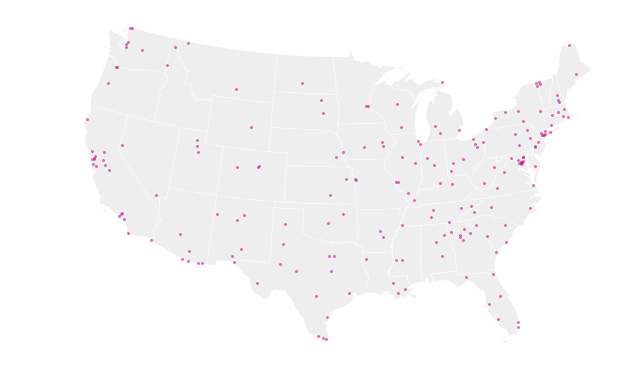

In [141]:
ax = states.plot(
    color='#dedede',
    edgecolor='white',
    linewidth=0.25,
    figsize=(10,10)
)
geo_merge.plot(
    markersize=2,
    linewidth=0,
    ax=ax,
    color='#c51b8a',
    alpha=0.5)
ax.axis('off')

## Artwork dimensions

In [7]:
width_height = df_finearts['FINEARTS_ARTWORKDIM'].str.extract(r'(\d+)[^xX]+[xX] (\d+)')
df_finearts['dim_width'] = width_height[0].astype(float)
df_finearts['dim_height'] = width_height[1].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [12]:
convertion_table = {
    'cm': 0.393701,
    'mm': 0.0393701,
    'inches': 1
}

def convert_to_inches(row):
    raw_dimensions = row['FINEARTS_ARTWORKDIM']
        
    if (pd.notnull(row['dim_width'])) & pd.notnull(row['dim_height']):
        if re.search('inc', raw_dimensions, flags=re.IGNORECASE):
            unit = 'inches'
        elif re.search('cm|cen', raw_dimensions, flags=re.IGNORECASE):
            unit = 'cm'
        elif re.search('mm', raw_dimensions, flags=re.IGNORECASE):
            unit = 'mm'
        elif (pd.isnull(row['dim_width'])) & (pd.isnull(row['dim_height'])):
            unit = np.nan
        else:
            unit = 'inches'
            
        converted_width = row['dim_width'] * convertion_table[unit]
        converted_height = row['dim_height'] * convertion_table[unit]
    else:
        unit = np.nan
        converted_width = np.nan
        converted_height = np.nan
    
    return converted_height
#     return pd.Series([
#         converted_width,
#         converted_height,
#         'inches'
#     ])

df_finearts['dim_heigth_inches'] = df_finearts.apply(convert_to_inches, axis=1)
#df_finearts[['dim_width', 'dim_height', 'unit']] = df_finearts.progress_apply(convert_to_inches, axis=1)
#df_finearts[['dim_width', 'dim_height', 'unit']] = df_finearts.apply(convert_to_inches, axis=1)

In [14]:
#df_finearts.to_csv("finearts_with_dimensions.csv", index=False)

In [20]:
df_finearts.loc[df_finearts['FINEARTS_APPRAISAL'] == 'WPA', 'FINEARTS_APPRAISAL'] = 'NaN'
df_finearts.loc[df_finearts['FINEARTS_APPRAISAL'] == 'WNR', 'FINEARTS_APPRAISAL'] = 'NaN'
df_finearts['FINEARTS_APPRAISAL'] = df_finearts['FINEARTS_APPRAISAL'].astype(float)

In [21]:
df_finearts['FINEARTS_DATE'] = df_finearts['FINEARTS_EXECDATE'].str.extract(r'(\d\d\d\d)')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [22]:
df_finearts['FINEARTS_DATE'] = pd.to_datetime(df_finearts['FINEARTS_DATE'], format='%Y', errors='coerce')

In [29]:
df_finearts.head()

,FAARTIST_SURNAME,FAP_DEFINITION,FINEARTS_APPRAISAL,FINEARTS_ARTWORKDIM,FINEARTS_BORROWER,FINEARTS_BUILDING_ID,FINEARTS_DEACCESSIONED,FINEARTS_EXECDATE,FINEARTS_FRAMEDIM,dim_width,dim_height,dim_width_inches,dim_heigth_inches,FINEARTS_DATE
0,Nottingham,Fine Arts,0.0,30 1/4'' x 35 1/2'' x 1 1/4'',NaN,476.0,0,1934,30 x 35 1/2 inches,30.0,35.0,30.0,35.0,1934-01-01
1,Nottingham,Fine Arts,0.0,30 1/4'' x 35 1/2'' x 1 1/4'',NaN,476.0,0,1934,30 x 35 1/2 inches,30.0,35.0,30.0,35.0,1934-01-01
2,Nottingham,Fine Arts,0.0,30 1/4'' x 35 1/2'' x 1 1/4'',NaN,476.0,0,1934,30 x 35 1/2 inches,30.0,35.0,30.0,35.0,1934-01-01
3,Unknown,Fine Arts,250.0,18 1/4 x 13 3/4 inches,NaN,476.0,0,NaN,24 5/8 x 20 inches,18.0,13.0,18.0,13.0,NaT
4,Unknown,Fine Arts,250.0,18 1/4 x 13 3/4 inches,NaN,476.0,0,NaN,24 5/8 x 20 inches,18.0,13.0,18.0,13.0,NaT


In [47]:
df_finearts[[
    'FAARTIST_SURNAME',
    'FAP_DEFINITION',
    'FINEARTS_DATE',
    'FINEARTS_APPRAISAL',
    'FINEARTS_BUILDING_ID',
    'FINEARTS_DEACCESSIONED',
    'dim_width_inches',
    'dim_heigth_inches']].to_csv("finearts_with_dimensions.csv", index=False)

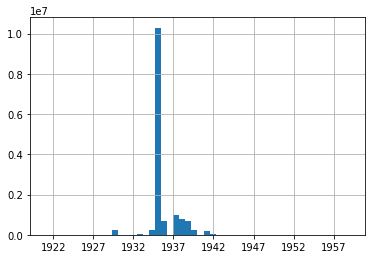

In [179]:
df_finearts[(df_finearts['FINEARTS_DATE'].dt.year > 1920) & (df_finearts['FINEARTS_DATE'].dt.year < 1960)]['FINEARTS_DATE'].hist(bins=50)

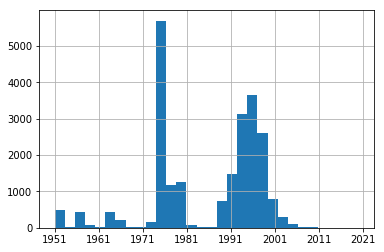

In [194]:
df_finearts[df_finearts['FINEARTS_DATE'].dt.year > 1950]['FINEARTS_DATE'].hist(bins=30)

In [191]:
df_finearts['FINEARTS_DATE'].value_counts().sort_index()

1834-01-01      50
1856-01-01      16
1857-01-01      17
1858-01-01       1
1882-01-01       1
1883-01-01      57
1885-01-01       8
1887-01-01       4
1888-01-01       2
1899-01-01      68
1900-01-01      12
1905-01-01      18
1906-01-01      89
1907-01-01     161
1908-01-01      97
1909-01-01      11
1910-01-01      47
1911-01-01      50
1912-01-01      95
1913-01-01      64
1914-01-01     129
1915-01-01      19
1916-01-01       2
1917-01-01       1
1921-01-01      15
1922-01-01      18
1924-01-01      81
1925-01-01       5
1927-01-01       4
1928-01-01      13
              ... 
1982-01-01      19
1983-01-01       2
1984-01-01       8
1985-01-01      14
1986-01-01       6
1987-01-01      29
1988-01-01      11
1989-01-01     105
1990-01-01     628
1991-01-01      77
1992-01-01    1395
1993-01-01    2651
1994-01-01     487
1995-01-01    2463
1996-01-01    1190
1997-01-01     243
1998-01-01    1132
1999-01-01    1234
2000-01-01     453
2001-01-01     327
2002-01-01     190
2003-01-01  

In [24]:
df_finearts.shape

(16335375, 14)

In [98]:
df_finearts['FINEARTS_APPRAISAL'].sum()

1163394140.0

In [90]:
df_finearts_wd = df_finearts.drop_duplicates()

In [95]:
df_finearts_wd.shape

(17964, 14)

In [96]:
df_finearts_wd['FINEARTS_APPRAISAL'].sum()

46421966.0

In [94]:
df_finearts_wd['FINEARTS_BUILDING_ID'].value_counts()

84.0      11112
476.0      1289
487.0       595
490.0       318
482.0       306
484.0       150
1935.0      130
488.0       124
486.0        82
83.0         57
1937.0       54
0.0          51
1939.0       39
485.0        37
85.0         37
81.0         35
491.0        33
43.0         30
326.0        27
167.0        26
1938.0       25
1940.0       23
86.0         19
454.0        18
1936.0       18
351.0        18
303.0        17
298.0        17
226.0        16
57.0         15
          ...  
383.0         1
252.0         1
230.0         1
189.0         1
427.0         1
458.0         1
493.0         1
2006.0        1
361.0         1
40.0          1
28.0          1
7.0           1
480.0         1
160.0         1
100.0         1
1977.0        1
10.0          1
253.0         1
467.0         1
407.0         1
217.0         1
499.0         1
498.0         1
87.0          1
441.0         1
164.0         1
260.0         1
173.0         1
115.0         1
425.0         1
Name: FINEARTS_BUILDING_

In [97]:
df_finearts_wd.sort_values('FINEARTS_APPRAISAL', ascending=False)

,FAARTIST_SURNAME,FAP_DEFINITION,FINEARTS_APPRAISAL,FINEARTS_ARTWORKDIM,FINEARTS_BORROWER,FINEARTS_BUILDING_ID,FINEARTS_DEACCESSIONED,FINEARTS_EXECDATE,FINEARTS_FRAMEDIM,dim_width,dim_height,dim_width_inches,dim_heigth_inches,FINEARTS_DATE
16334099,Puryear,Art-in-Architecture,1000000.0,40' tall,NaN,109.0,0,1997,NaN,NaN,NaN,NaN,NaN,1997-01-01
15489575,Stella,Art-in-Architecture,875000.0,"192 x 198""""",NaN,317.0,0,2005,NaN,192.0,198.0,192.000000,198.000000,2005-01-01
3387,Cadmus,New Deal Fine Art Projects,825000.0,"83 x 36""""",NaN,430.0,0,1939,NaN,83.0,36.0,83.000000,36.000000,1939-01-01
3378,French,New Deal Fine Art Projects,825000.0,"83 x 13'11-1/2""""",NaN,430.0,0,1939,NaN,83.0,13.0,83.000000,13.000000,1939-01-01
15703188,Kelly,Art-in-Architecture,800000.0,NaN,NaN,192.0,0,1998,NaN,NaN,NaN,NaN,NaN,1998-01-01
15489533,Dine,Art-in-Architecture,708000.0,37' tall,NaN,334.0,0,2003,NaN,NaN,NaN,NaN,NaN,2003-01-01
8639256,Calder,Art-in-Architecture,700000.0,68 H x 92 1/2 L x 46 1/4 W,Caroline Sachay,480.0,0,ca.1973,NaN,68.0,92.0,68.000000,92.000000,1973-01-01
9271919,Calder,Fine Arts,700000.0,11' x 11',NaN,308.0,0,ca.1965,NaN,11.0,11.0,11.000000,11.000000,1965-01-01
16334097,Sonnier,Art-in-Architecture,700000.0,30' wide x 49' high,NaN,109.0,0,1997,NaN,30.0,49.0,30.000000,49.000000,1997-01-01
14111,Berninghaus,New Deal Fine Art Projects,600000.0,"56 1/4 x 231 3/4""""",NaN,20.0,1,1938,NaN,56.0,231.0,56.000000,231.000000,1938-01-01


In [120]:
df_finearts['FAP_DEFINITION'].unique()

array(['Fine Arts', 'New Deal Fine Art Projects',
       'WPA Non-Fed. Repos. Loan', 'Art-in-Architecture', nan,
       'Special Purchase', 'Other Federal Agency',
       'Architectural Model/Plans', 'WPA Non-Fed. Repos. Alloc.', 'I',
       'Other'], dtype=object)

In [119]:
df_finearts.loc[df_finearts['FINEARTS_APPRAISAL'] == 200000.0]

,FAARTIST_SURNAME,FAO_CODE,FAO_DEFINITION,FAO_EMAIL,FAO_FIRSTNAME,FAO_ID,FAO_LASTNAME,FAO_PHONE,FAO_REGION,FAP_DEFINITION,FAP_ID,FINEARTS_AGENCIES_ID,FINEARTS_APPRAISAL,FINEARTS_APPRAISER_SOURCE,FINEARTS_APPRYEAR,FINEARTS_ARTWORKDIM,FINEARTS_BLOAN,FINEARTS_BORROWER,FINEARTS_BORRTITLE,FINEARTS_BUILDING_ID,FINEARTS_DEACCESSIONED,FINEARTS_ELOAN,FINEARTS_EXECDATE,FINEARTS_EXECDATE_YEAR,FINEARTS_EXTINT,FINEARTS_FAARTIST_ID,FINEARTS_FAO_ID,FINEARTS_FAP_ID,FINEARTS_FRAMEDIM,FINEARTS_ILOAN
15820565,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
15820566,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
15820567,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
15820568,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
15820569,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
15820570,Lutz,ENT,"Entorf,Audrey",NaN,Audrey,3.0,Entorf,404-331-0060,4,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2001.0,NaN,NaN,NaN,NaN,145.0,0,NaN,2001,NaN,E,1223,3,AIA,NaN,NaN
16326097,Healy,KLI,"Kline, Steve",NaN,Steve,8.0,Kline,817-978-4229,7,Art-in-Architecture,AIA,NaN,200000.0,AiA cost,2009.0,26' x 40',NaN,NaN,NaN,419.0,0,NaN,2009,NaN,I,2591,8,AIA,NaN,NaN


In [58]:
df_finearts['FAARTIST_SURNAME'].value_counts()

Murphy                            486349
Polos                             296446
Gallagher                         222668
Unknown                           204122
Hagedorn                          204088
Constant                          180399
Mesibov                           174001
Thrash                            145512
Dean                              140647
Becker                            140552
Surendorf                         139533
Turner                            139287
Kahn                              129062
Flint                             127154
Dorgeloh                          126086
Pytlak                            122808
Webb                              120274
Rivol                             119477
Chaney                            117339
Clark, Sr.                        115709
Abelman                           115645
Nooney                            115182
Pommer                            114210
Steth                             113964
Botts           

In [18]:
df_merge.loc[df_merge['finearts_appraisal'] == df_merge['finearts_appraisal'].max()]

,faartist_surname,fap_definition,finearts_date,finearts_appraisal,finearts_building_id,finearts_deaccessioned,dim_width_inches,dim_height_inches,building_city,building_id,building_name,building_state,building_zip
16334099,Puryear,Art-in-Architecture,1997-01-01,1000000.0,109.0,0,NaN,NaN,Washington,109.0,Ronald Reagan Building,DC,20002.0


In [32]:
df_merge.loc[df_merge['finearts_appraisal'] > 100000].sort_values('finearts_date', ascending=False)

,faartist_surname,fap_definition,finearts_date,finearts_appraisal,finearts_building_id,finearts_deaccessioned,dim_width_inches,dim_height_inches,building_city,building_id,building_name,building_state,building_zip
16326120,Healy,Art-in-Architecture,2009-01-01,200000.0,419.0,0,26.0,40.0,Houston,419.0,Houston FBI Facility,TX,77002.0
16206687,Shin,Art-in-Architecture,2008-01-01,150000.0,204.0,0.0,14.0,58.0,Baltimore,204.0,G.H. Fallon Federal Building,MD,21201.0
15486108,White,Art-in-Architecture,2008-01-01,269000.0,329.0,0,NaN,NaN,Cleveland,329.0,A. J. Celebrezze Federal Building,OH,44199.0
16262920,Kim,Art-in-Architecture,2008-01-01,284183.0,15.0,0,NaN,NaN,Little Rock,15.0,U.S. Post Office & Courthouse,AR,72201.0
16314980,Turrell,Art-in-Architecture,2007-01-01,250000.0,57.0,0,NaN,NaN,San Francisco,57.0,San Francisco Federal Building,CA,94103.0
15889490,Bruch,Art-in-Architecture,2006-01-01,139252.0,473.0,0,NaN,NaN,Eugene,473.0,Wayne Lyman Morse U.S. Courthouse,OR,97401.0
15486105,Manglano-Ovalle,Art-in-Architecture,2006-01-01,159890.0,158.0,0,NaN,NaN,Chicago,158.0,Federal Building,IL,60605.0
15298594,Campbell,Art-in-Architecture,2006-01-01,195000.0,70.0,0,10.0,20.0,Denver,70.0,Byron G. Rogers Federal Building & Courthouse,CO,80294.0
15888475,Ritchie,Art-in-Architecture,2006-01-01,320000.0,473.0,0,97.0,38.0,Eugene,473.0,Wayne Lyman Morse U.S. Courthouse,OR,97401.0
15535399,Campbell,Art-in-Architecture,2006-01-01,195000.0,70.0,0,30.0,40.0,Denver,70.0,Byron G. Rogers Federal Building & Courthouse,CO,80294.0


In [37]:
df_merge[df_merge['faartist_surname'].str.contains('thko', na=False)]

,faartist_surname,fap_definition,finearts_date,finearts_appraisal,finearts_building_id,finearts_deaccessioned,dim_width_inches,dim_height_inches,building_city,building_id,building_name,building_state,building_zip


In [46]:
len(df_merge['faartist_surname'].unique())

2125

In [74]:
df['FAARTIST_FIRSTNAME'].fillna('', inplace=True)

In [44]:
len(df['FAARTIST_SURNAME'].unique())

2124

In [116]:
df.head()

,INSPECT_CAU8,INSPECT_CAU9,INSPECT_CONDITION,INSPECT_CONDSTAT_ID,INSPECT_CYCLICDONE,INSPECT_CYCLICPLAN,INSPECT_DMM,INSPECT_DTT,INSPECT_ENV1,INSPECT_ENV2,INSPECT_ENV3,INSPECT_ENV4,INSPECT_ENV5,INSPECT_ENV6,INSPECT_ENV7,INSPECT_ENV8,INSPECT_ENV9,INSPECT_FAP,INSPECT_FILEDATE,INSPECT_FILER,INSPECT_FILERTIT,INSPECT_FRA1,INSPECT_FRA10,INSPECT_FRA2,INSPECT_FRA3,INSPECT_FRA4,INSPECT_FRA5,INSPECT_FRA6,INSPECT_FRA7,INSPECT_FRA8
0,NaN,NaN,No Defect,4.0,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-JUL-07,Kathy Erickson,FINE ARTS PROGRAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,No Defect,4.0,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-JUL-07,Kathy Erickson,FINE ARTS PROGRAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,No Defect,4.0,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12-JUL-07,Kathy Erickson,FINE ARTS PROGRAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20-JAN-10,Mary Margaret Carr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,No Defect,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13-MAR-06,ERIN CLAY,FINE ARTS PROGRAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
